<a href="https://colab.research.google.com/github/saswatisamal/PythonWithGenAI/blob/main/IdentifyHandWrittenDigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow


In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

#To find shape of x_train,y_train,x_test,y_test
x_test.shape
x_train.shape

#Norma

#define the model for handwritten digits
#relu= max(0,xi)
# softmax activation is used in multi-class classification where input belongs to one and only one class,model to output probabilities across all classes that sum to 1.
x_train,x_test=x_train/255.0,x_test/255.0
model=models.Sequential([
                         layers.Flatten(input_shape=(28,28)),
                         layers.Dense(128,activation='relu'),
                         layers.Dense(10,activation='softmax')

])
model.summary()

#compile the model
#sparse_categorical_crossentropy expects integer labels, like [0, 1, 2].

#categorical_crossentropy expects one-hot labels, like [[1,0,0],[0,1,0],[0,0,1]].
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#Start training the model with train data
history =model.fit(x_train,y_train,epochs=5)


















/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8770 - loss: 0.4293
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9661 - loss: 0.1184
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9762 - loss: 0.0790
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9827 - loss: 0.0588
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9876 - loss: 0.0415


ValueError: Arguments not recognized: {'epoch': 2}

In [19]:
#Check with the test data if model is underfitting or overfitting
#If loss with train_data is min but with test_data is very bad or high then model is overfitted.
#If loss with  both train_data and test_data is high then model is undertrained or underfitted

test_loss,test_accurracy=model.evaluate(x_test,y_test)
print(f'Test accuracy: {test_accurracy*100:.2f}%')
print(f'Test loss: {test_loss*100:.2f}%')





313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9713 - loss: 0.0957
Test accuracy: 97.49%
Test loss: 8.21%


In [36]:

#predict the output for the input from test data
prediction=model.predict(x_test)
#print(predict[0])

print(prediction)

print(f'y_predicted: {np.argmax(predict[0])} and  y_true:{y_test[0]}')

print(f'y_predicted: {np.argmax(predict[999])} and y_true:{y_test[999]}')





313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[1.15769616e-07 1.65244654e-08 2.95166246e-04 ... 9.93083954e-01
  2.47173139e-05 1.27849535e-05]
 [2.83453225e-08 9.57762131e-06 9.99917448e-01 ... 3.13626739e-15
  1.18491084e-06 7.24491604e-12]
 [4.42375864e-07 9.99232054e-01 8.00011694e-05 ... 3.39584512e-04
  2.89066782e-04 9.10424603e-07]
 ...
 [9.24117215e-14 1.60777625e-09 2.25684107e-11 ... 7.98861279e-08
  1.15205472e-08 4.37020390e-06]
 [1.66350909e-11 2.48468163e-10 1.35286018e-10 ... 1.86834520e-10
  2.39288624e-04 5.87376259e-11]
 [5.06674360e-06 2.17824682e-11 3.24448678e-07 ... 1.21457054e-12
  7.93203669e-10 6.36318553e-10]]
y_predicted: 7 and  y_true:7
y_predicted: 9 and y_true:9


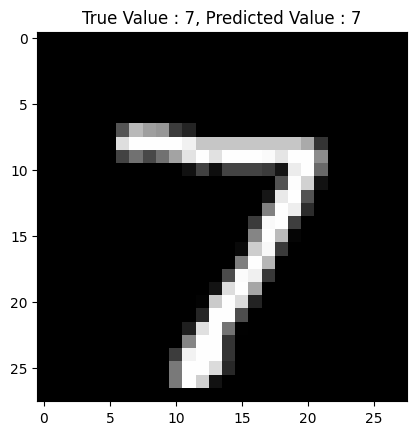

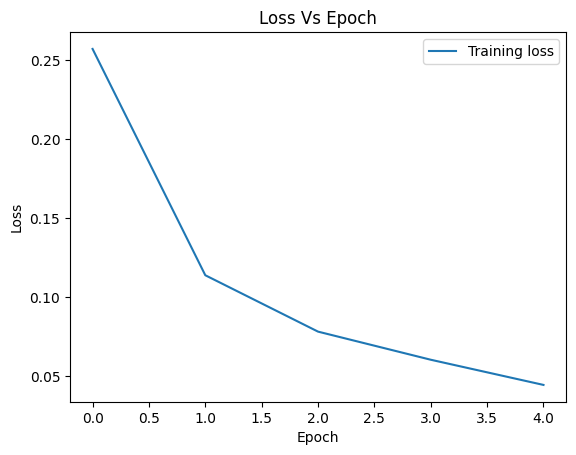

In [41]:
#Difference between plot and imshow :
#plot plots graph ,imshow shows images
#Plot the graph for x_test which is 28*28
plt.imshow(x_test[0], cmap='gray')
#plt.xticks(range(28))
#plt.yticks(range(28))
plt.title(f"True Value : {y_test[0]}, Predicted Value : {np.argmax(prediction[0])}")
plt.show()



#Plot graph between epoch and loss
plt.figure() # Add this line to create a new figure for the second plot
plt.plot(history.history['loss'],label='Training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Vs Epoch')
plt.show()